# Exploratory Data Analysis and Machine Learning Predictive Analysis
## Author: Nic Vetter
## Date: 7/23/2024
### This Jupyter Notebook will show the EDA of my cleaned Iowa Public School data, as well as the Predictive Machine Learning techniques I have learned throughout the MSDA Program
### Included within the EDA is descriptive stats of the data set, histograms of numerical attributes, bar charts of categorical attributes, along with the initial visualizations of the data set.
### Predictive Machine Learning includes the following models: Linear Regression and Logistical Regression. 
### These two models did the best job of telling the story of the Iowa Public School dataset

### Data Acquisition - Reading and Viewing Dataset

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np


# Loading my CSV file
df = pd.read_csv('cleandata.csv')
print(df.head())




   fiscalyear  dist        district_name       source  expenditures_per_pupil  \
0        2017     9                AGWSR  Instruction                    7989   
1        2017   441                AHSTW  Instruction                    7318   
2        2017    27  Adel DeSoto Minburn  Instruction                    7174   
3        2017    63      Akron Westfield  Instruction                    8339   
4        2017    81                Albia  Instruction                    7048   

     amount enrollment_category  enrollment_category_number    topic  \
0   4997256             600-999                           3  Reading   
1   5744497             600-999                           3  Reading   
2  11256504         1,000-2,499                           4  Reading   
3   4302923             300-599                           2  Reading   
4   8506189         1,000-2,499                           4  Reading   

   proficient  total  percent_proficient proficient_category  
0          32    

### Data Inspection: Data Type Information, Stats for Numberical Attributes, and Missing Value Verification

In [20]:
# Data Type Info
print("\nData Type Info:")
print(df.info())

# Summary Stats for Number Attributes
print("\nStat Summary:")
print(df.describe())

# Missing Value Check
print("\nMissing Values:")
print(df.isnull().sum())



Data Type Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   fiscalyear                  297 non-null    int64  
 1   dist                        297 non-null    int64  
 2   district_name               297 non-null    object 
 3   source                      297 non-null    object 
 4   expenditures_per_pupil      297 non-null    int64  
 5   amount                      297 non-null    int64  
 6   enrollment_category         297 non-null    object 
 7   enrollment_category_number  297 non-null    int64  
 8   topic                       297 non-null    object 
 9   proficient                  297 non-null    int64  
 10  total                       297 non-null    int64  
 11  percent_proficient          297 non-null    float64
 12  proficient_category         297 non-null    object 
dtypes: float64(1), int

### Initial Data Distribution for Numerical Columns / Histogram of Expenditure per Pupil

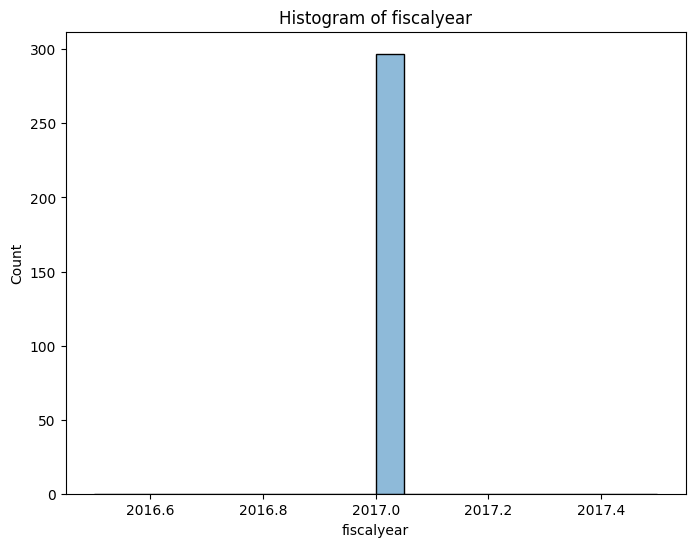

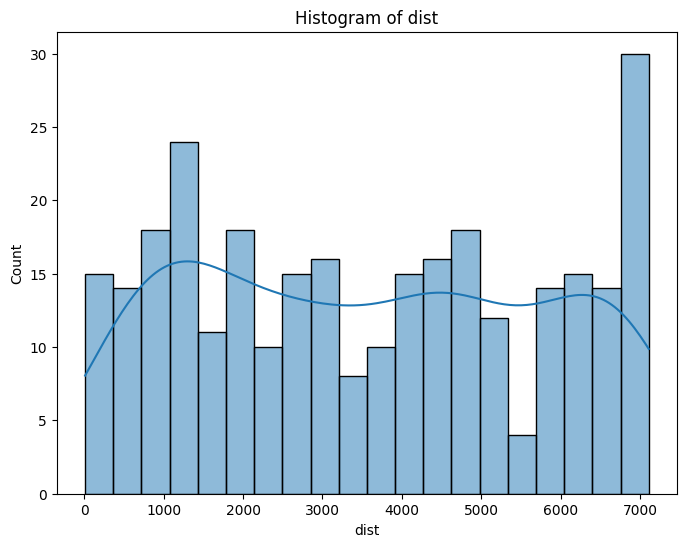

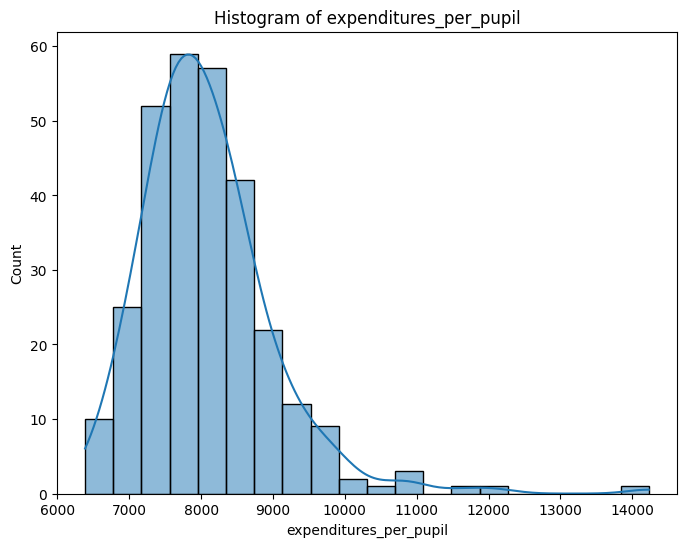

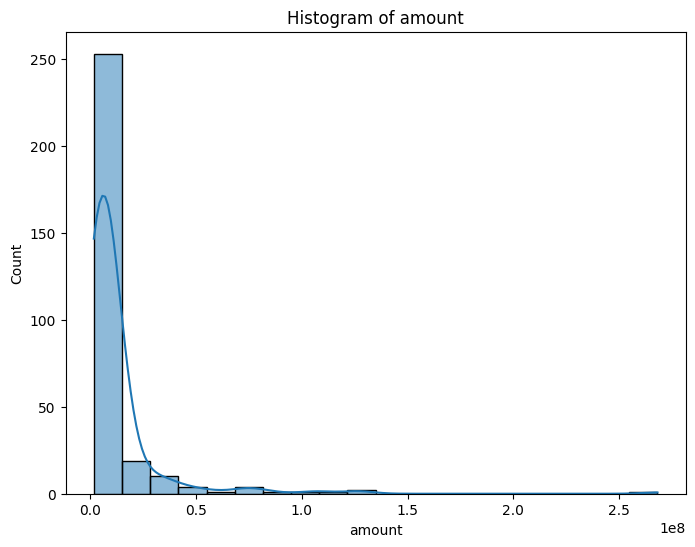

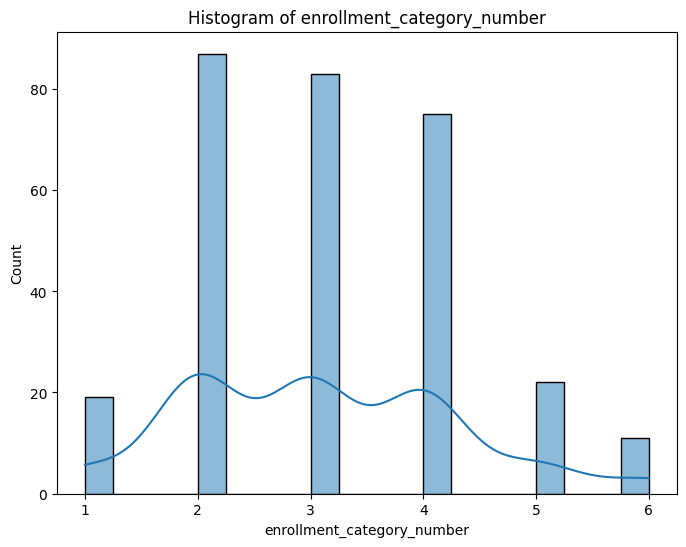

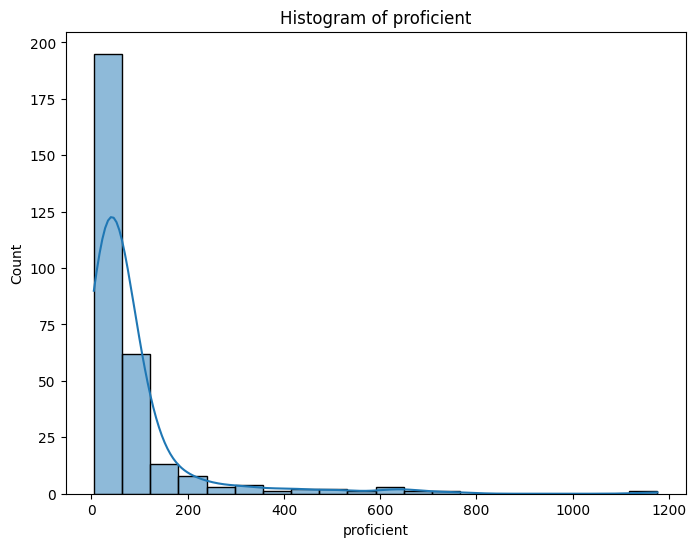

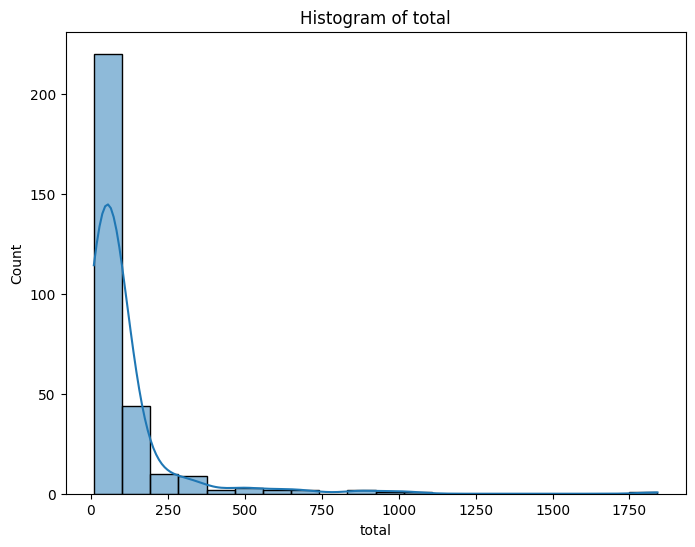

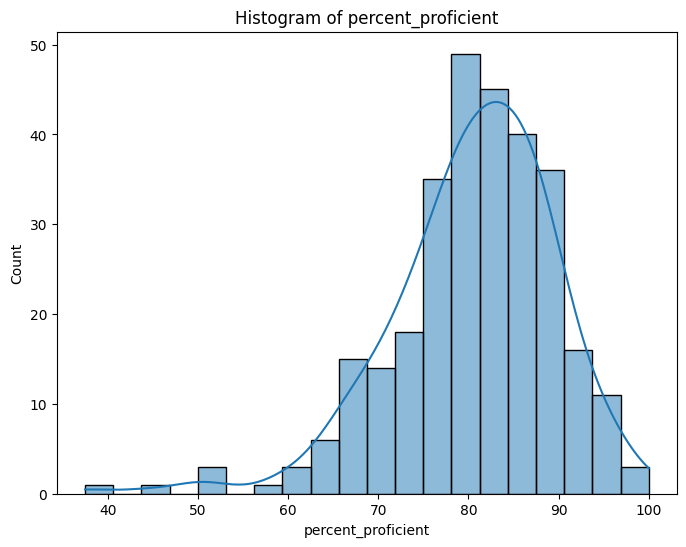

In [21]:
# Histograms of numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()





### Initial Data Distribution for Categorical Columns - The District_Name chart is pretty busy, but it shows the amount of Iowa Public Schools

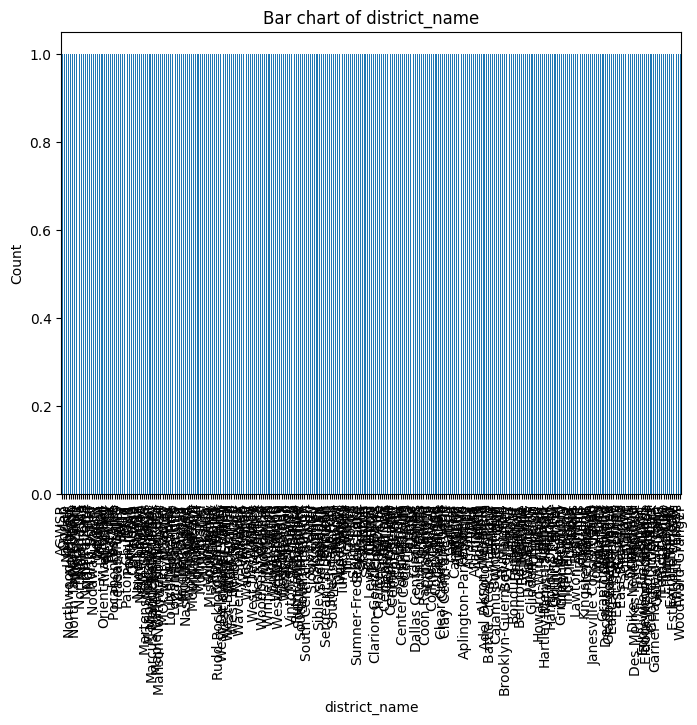

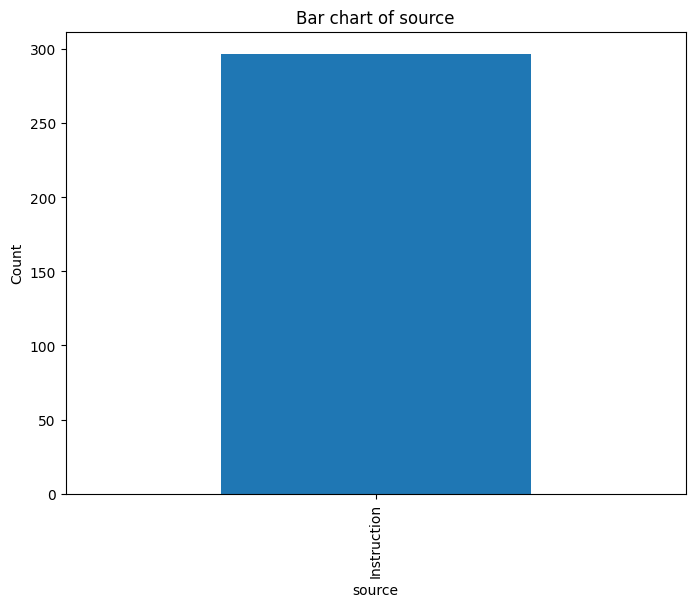

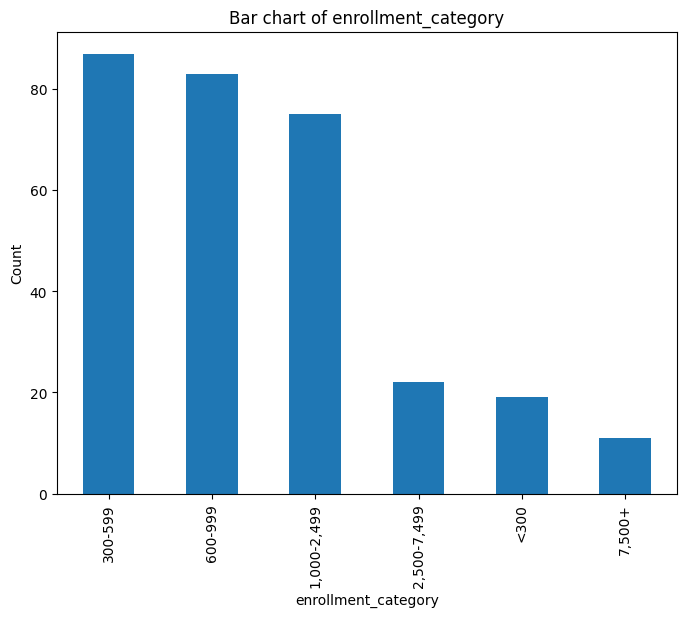

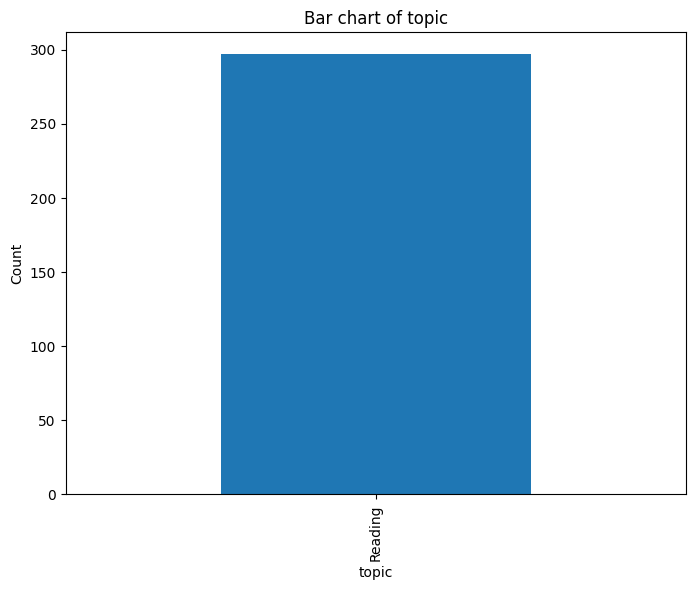

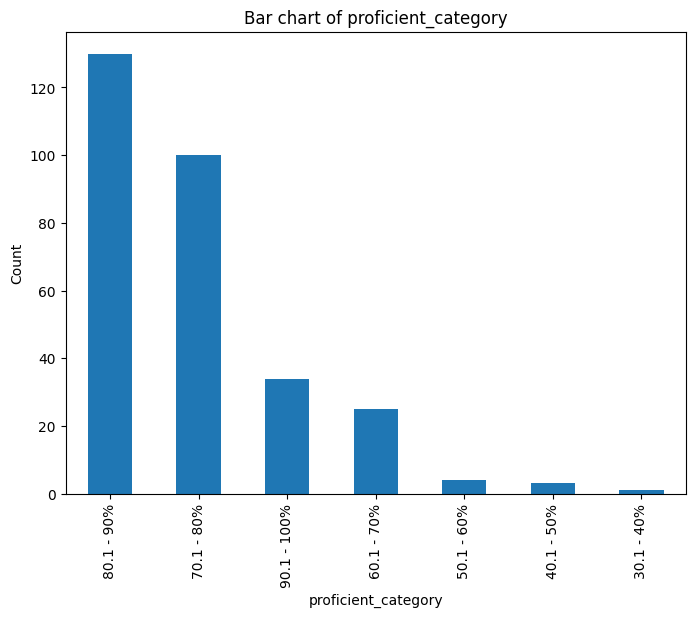

In [22]:
# Bar charts of categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    df[column].value_counts().plot(kind='bar')
    plt.title(f'Bar chart of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()



### Initial Data Preparation (or Data Preprocessing)
#### No more Data Preparation is required for my dataset. I have cleaned the dataset twice and cut it down to a very specific project. If I process/clean my data anymore, I will hurt the quality of my report and project. I have also already sucessfully JOINed the two CSV files so no further preprocessing is required. 

### INITIAL VISUALIZATIONS

#### - Average percent proficient for each enrollment category number. This category number is determined by enrollment. Please see prior histogram for more information on categories. 
#### - Best and Worst of 2017 Reading Proficiency - Top and Bottom 10 Iowa Public School Districts by Reading Proficiency
#### - 2017 Expenditure per Pupil vs Reading Proficiency Percentage Scatter Plot Correlation

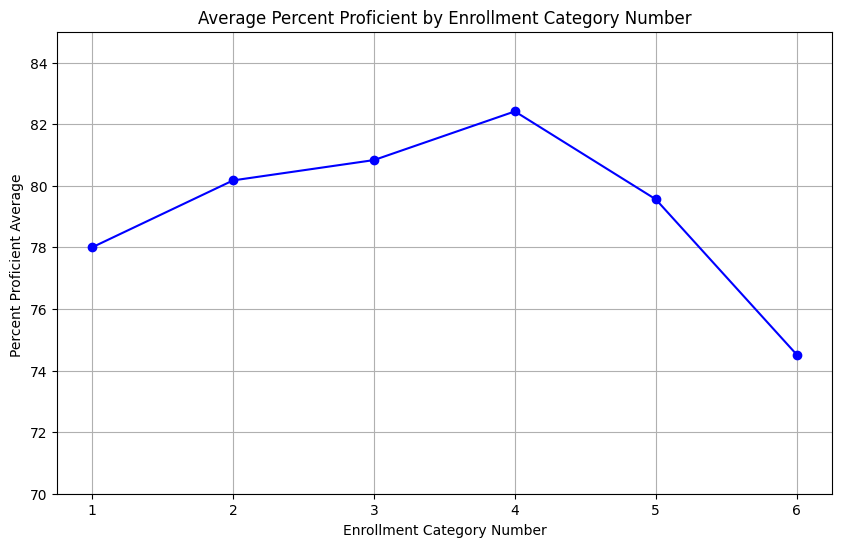

In [23]:
# Calculate average percent proficient for each enrollment category number
avg_percent_proficient = df.groupby('enrollment_category_number')['percent_proficient'].mean().reset_index()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(avg_percent_proficient['enrollment_category_number'], avg_percent_proficient['percent_proficient'], marker='o', linestyle='-', color='b')

# Add labels and title
plt.title('Average Percent Proficient by Enrollment Category Number')
plt.xlabel('Enrollment Category Number')
plt.ylabel('Percent Proficient Average ')
plt.grid(True)  # Add grid

# Set y-axis limits to show range from 70% to 85%
plt.ylim(70, 85)

# Show plot
plt.show()

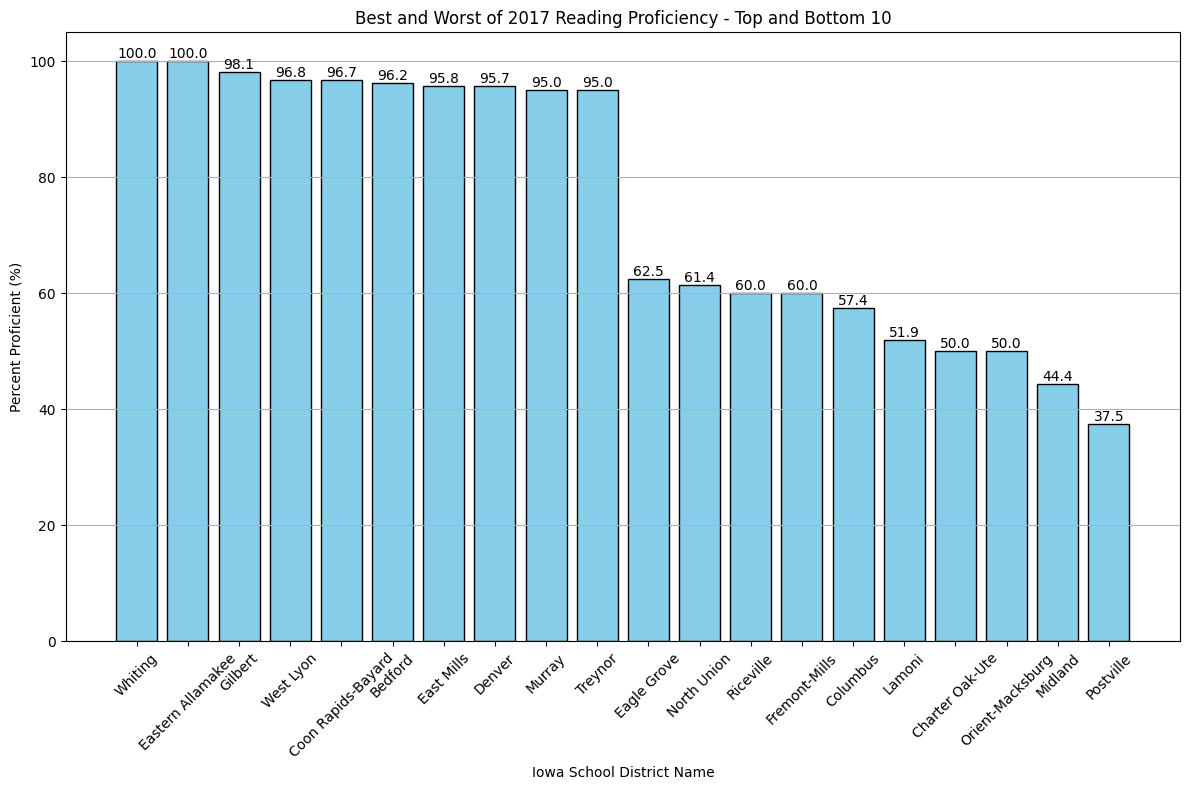

In [24]:
# Sort DataFrame by percent_proficient
df_sorted = df.sort_values(by='percent_proficient', ascending=False)

# Select top 10 and bottom 10 public school districts
top_bottom_10 = pd.concat([df_sorted.head(10), df_sorted.tail(10)])

# Creating a bar chart
plt.figure(figsize=(12, 8))
bars = plt.bar(top_bottom_10['district_name'], top_bottom_10['percent_proficient'], color='skyblue', edgecolor='black')

# Labeling title and axis
plt.title('Best and Worst of 2017 Reading Proficiency - Top and Bottom 10')
plt.xlabel('Iowa School District Name')
plt.ylabel('Percent Proficient (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add grid only on y-axis for bar chart

# Labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), va='bottom', ha='center')

# Show plot
plt.tight_layout()
plt.show()




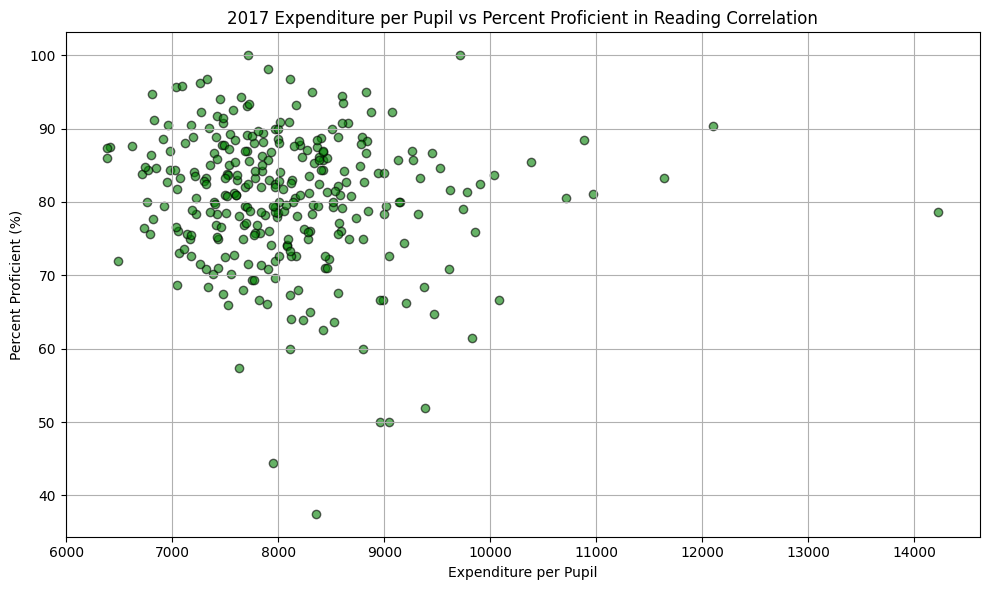

In [25]:
# Creating a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['expenditures_per_pupil'], df['percent_proficient'], alpha=0.6, color='g', edgecolors='k')

# Adding labels and title
plt.title('2017 Expenditure per Pupil vs Percent Proficient in Reading Correlation')
plt.xlabel('Expenditure per Pupil')
plt.ylabel('Percent Proficient (%)')
plt.grid(True)  # Add grid

# Showing plot
plt.tight_layout()
plt.show()


# Machine Learning in Python: Correlation of Iowa High School Expenditures/Sizes on Reading Proficiency

### The following Machine Learning Algorithims will be conducted by using Linear Regression, Logistic Regression, and Random Forest Models.

### Linear Regression Models

### The Linear Regression Models below show if there is any correlation between expense/district size and Reading Proficiency

### Linear Regression of Expenditure per pupil

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Features and target
X = df[['expenditures_per_pupil']]
y = df['percent_proficient']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)


mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Printing
print('Linear Regression Results for expenditures_per_pupil:')
print(f'Mean Squared Error: {mse_lr:.2f}')
print(f'R-squared: {r2_lr:.2f}')


Linear Regression Results for expenditures_per_pupil:
Mean Squared Error: 67.95
R-squared: 0.01


### Linear Regression of District Enrollment Size 

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Features and target
X = df[['enrollment_category_number']]
y = df['percent_proficient']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluation
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Print results
print('Linear Regression Results for enrollment_category_number:')
print(f'Mean Squared Error: {mse_lr:.2f}')
print(f'R-squared: {r2_lr:.2f}')

Linear Regression Results for enrollment_category_number:
Mean Squared Error: 68.98
R-squared: -0.00


### Logistic Regression Model for the prediction of Reading Proficiency of >80%

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Features and target
X = df[['expenditures_per_pupil', 'enrollment_category_number']]
y = (df['percent_proficient'] > 80).astype(int)  # Creating binary target based on a threshold

# Splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Initialize Logistic model
logreg_model = LogisticRegression(random_state=123)

# Train 
logreg_model.fit(X_train, y_train)

# Predictions
y_pred_logreg = logreg_model.predict(X_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred_logreg)
print(f'Accuracy: {accuracy:.2f}')
# Printing
print('\nClassification Report:')
print(classification_report(y_test, y_pred_logreg))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_logreg))



Accuracy: 0.48

Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.17      0.24        30
           1       0.49      0.80      0.61        30

    accuracy                           0.48        60
   macro avg       0.47      0.48      0.43        60
weighted avg       0.47      0.48      0.43        60

Confusion Matrix:
[[ 5 25]
 [ 6 24]]


## Conclusion: 

#### - The above statistics and graphs do a great job of exploring the data so I can think how I want to pursue the machine learning correlations. The visuals do a great job of providing the reader with a landscape of the Iowa Public School systems. 

#### - After the Machine Learning Models have been ran and analyzed, I have concluded that there isn't much correlation between expenditures, district enrollment size, and reading proficiency. It is kind of a bummer that there isn't much correlation, but that is the world of data science. Sometimes you won't be able to find any correlation in a data set. Thanks, Nic Vetter